In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import library and read file csv

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/drive/MyDrive/churn.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6966,6967,15689661,Gorbunov,663,France,Male,22,6,0.00,2,0,1,131827.15,0
6569,6570,15604706,Blake,581,Germany,Male,38,1,133105.47,1,1,0,105732.90,1
7230,7231,15805627,Nebechukwu,670,France,Male,37,2,0.00,2,1,1,54229.74,0
6702,6703,15792668,Hamilton,661,Germany,Male,37,7,109908.06,2,1,0,115037.67,1
9731,9732,15627859,Nebeolisa,607,Germany,Male,29,7,102609.00,1,1,0,163257.44,0


## Data processing


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [11]:
display(df.duplicated().sum())

0

In [12]:
df.rename(columns={'Exited':'Churn'}, inplace = True)

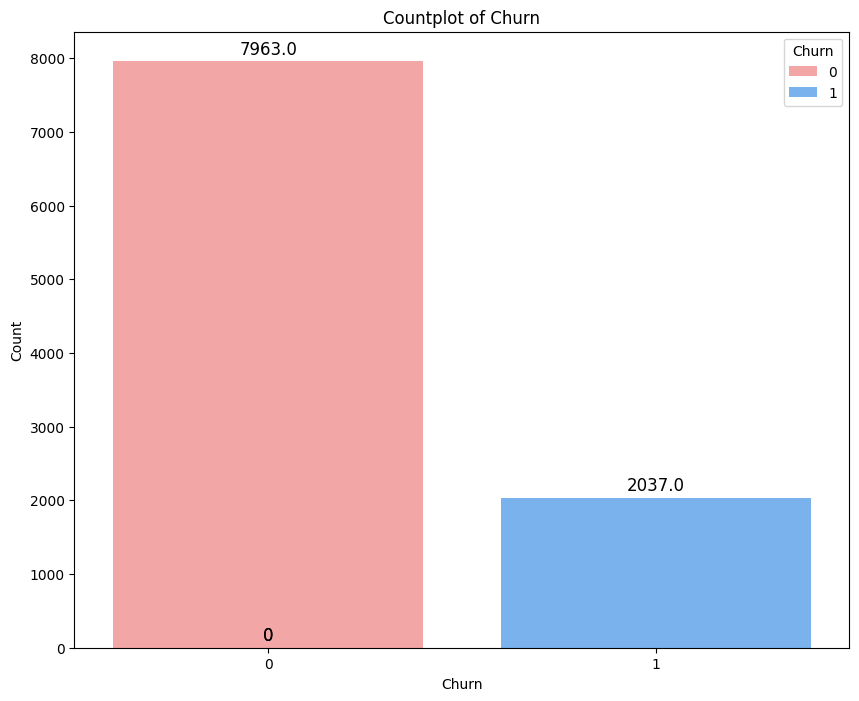

In [13]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x=df['Churn'],hue=df['Churn'], palette=['#FF9999', '#66B2FF'])
plt.title('Countplot of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

- From this countplot chart we can see that the majority of customers continue to use the bank's services, only 2037 are the number of customers leaving, which is small compared to the rest.

In [14]:
category_columns = ['Tenure','NumOfProducts','HasCrCard','IsActiveMember']
for column in category_columns:
    value_counts = df[column].value_counts()
    print(f"Counts of unique values in '{column}':")
    print(value_counts)
    print()

Counts of unique values in 'Tenure':
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

Counts of unique values in 'NumOfProducts':
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Counts of unique values in 'HasCrCard':
HasCrCard
1    7055
0    2945
Name: count, dtype: int64

Counts of unique values in 'IsActiveMember':
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64



<ipython-input-15-76fc22673766>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='HasCrCard', y='Churn', palette='pastel', inner='quartile')
<ipython-input-15-76fc22673766>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='IsActiveMember', y='Churn', palette='pastel', inner='quartile')


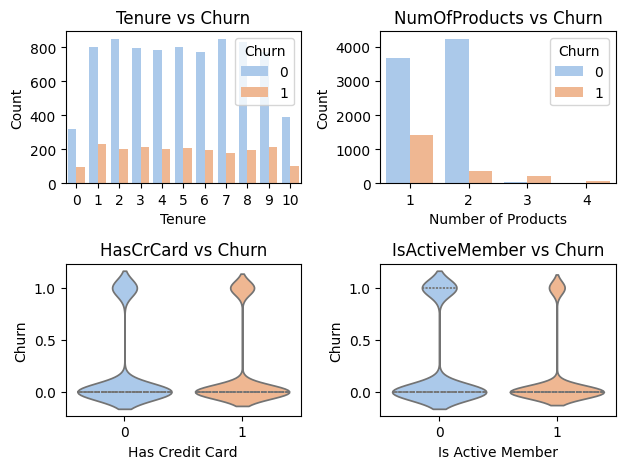

In [15]:
# 1. Bar Plot for 'Tenure'
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Tenure', hue='Churn', palette='pastel')
plt.title('Tenure vs Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

# 2. Bar Plot for 'NumOfProducts'
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='NumOfProducts', hue='Churn', palette='pastel')
plt.title('NumOfProducts vs Churn')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

# 3. Violin Plot for 'HasCrCard'
plt.subplot(2, 2, 3)
sns.violinplot(data=df, x='HasCrCard', y='Churn', palette='pastel', inner='quartile')
plt.title('HasCrCard vs Churn')
plt.xlabel('Has Credit Card')
plt.ylabel('Churn')

# 4. Violin Plot for 'IsActiveMember'
plt.subplot(2, 2, 4)
sns.violinplot(data=df, x='IsActiveMember', y='Churn', palette='pastel', inner='quartile')
plt.title('IsActiveMember vs Churn')
plt.xlabel('Is Active Member')
plt.ylabel('Churn')

plt.tight_layout()
plt.show()

1. **Tenure**: Customers with tenure between 1-9 years show a high churn rate, particularly those with 1-year and 9-year tenures. Conversely, customers with tenures over 9 years are less likely to churn, indicating greater loyalty to the bank.

2. **Number of Products**: Customers purchasing 1-2 products are the largest group and have a low churn rate, while those with 3-4 products exhibit a higher churn rate. Therefore, the number of products purchased is a good indicator of customer churn.

3. **Credit Cards**: Approximately 70% of customers have credit cards, yet the churn rate is higher among this group, suggesting that having a credit card does not guarantee customer loyalty.

4. **Active Membership**: The churn rate is higher among inactive customers compared to active members. The bank should focus on improving services for inactive members to retain them.


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

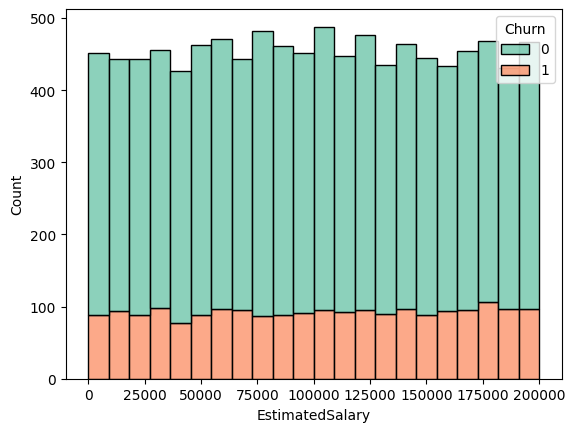

In [16]:
sns.histplot(data=df,x='EstimatedSalary',hue='Churn',multiple='stack',palette='Set2')

This graph shows the distribution of the **estimated salary** of the customers along with the churn count. On the whole the there is no definite pattern in the salary distribution of the customers who churned and who didn't. Therefore estimated salary is not a good predictor of churn.

### Label encoding the variable

In [17]:
variables = ['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in variables:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Geography [0 2 1]
Gender [0 1]


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,2,15647311,Hill,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,3,15619304,Onio,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,4,15701354,Boni,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,5,15737888,Mitchell,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


In [20]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0


### Coorelation Matrix Heatmap

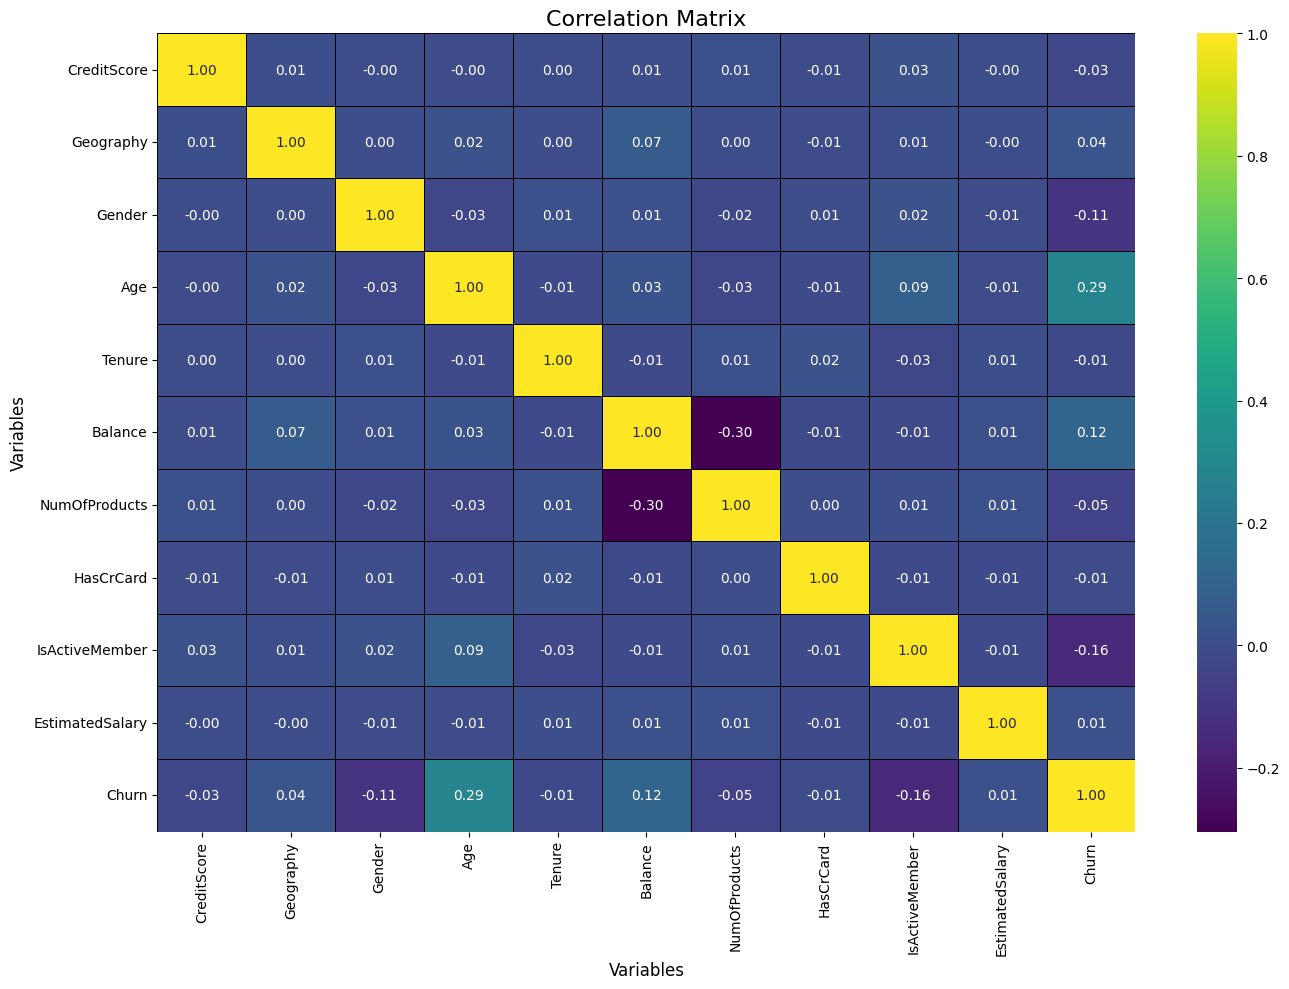

In [22]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, linecolor='black')  # Sử dụng colormap khác và thêm đường kẻ
plt.title('Correlation Matrix', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.tight_layout()
plt.show()

- There is no significant coorelation among the variables. So, I will proceed to model building.

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Churn',axis=1),df['Churn'],test_size=0.3,random_state=42)

## Churn Prediction

### Decision Tree Classifier

- Using GridSearchCV to find the best parameters for the model.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#creating Decision Tree Classifer object
dtree = DecisionTreeClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_dtree.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_dtree.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'random_state': 42}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [25]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, min_samples_leaf=10)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

In [26]:
#training the model
dtree.fit(X_train,y_train)
#training accuracy
dtree.score(X_train,y_train)

0.8581428571428571

- Predicting Customer Churn from Test set

In [27]:
dtree_pred = dtree.predict(X_test)

### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
#creating Random Forest Classifer object
rfc = RandomForestClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_rfc.fit(X_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_rfc.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'random_state': 0}


In [29]:
#training the model
rfc.fit(X_train, y_train)
#model accuracy
rfc.score(X_train, y_train)

0.9998571428571429

In [30]:
rfc_pred = rfc.predict(X_test)

### Model Evalution

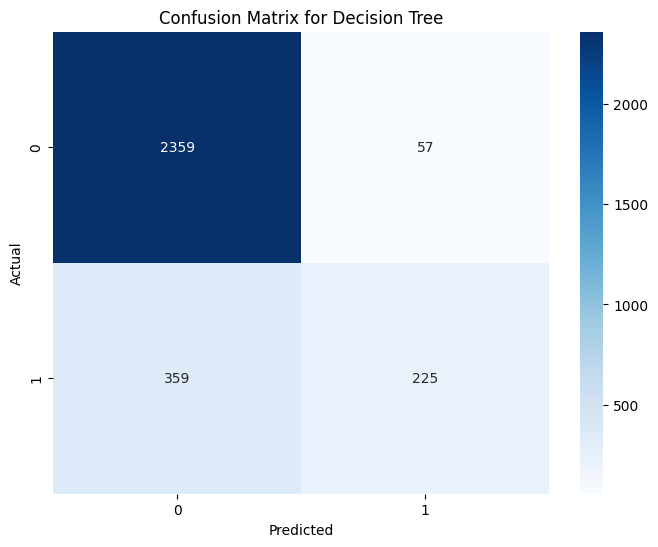

In [31]:
#confusion matrix heatmap
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

-
The True Positive shows the count of correctly classified data points whereas the False Positive elements are those that are misclassified by the model. The higher the True Positive values of the confusion matrix the better, indicating many correct predictions.

#### Distribution Plot

<ipython-input-32-584003bfddf2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-32-584003bfddf2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" ,

<Axes: xlabel='Churn', ylabel='Density'>

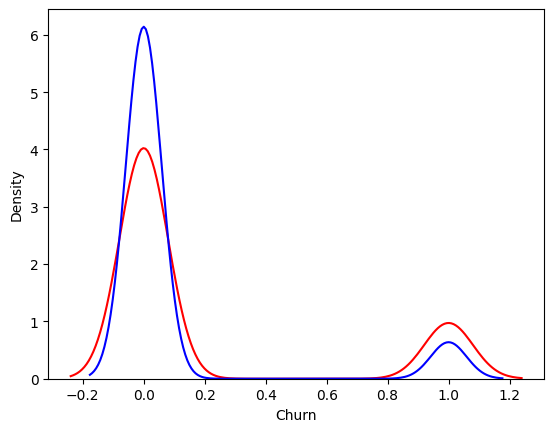

In [32]:

ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

- The more overlapping of two colors, the more accurate the model is.

### Classification Report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.80      0.39      0.52       584

    accuracy                           0.86      3000
   macro avg       0.83      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



In [34]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
print("Accuracy Score: ", accuracy_score(y_test, dtree_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, dtree_pred))
print("R2 Score: ", r2_score(y_test, dtree_pred))

Accuracy Score:  0.8613333333333333
Mean Absolute Error:  0.13866666666666666
R2 Score:  0.11548580241313633


### Random Forest Classifier

#### Confusion Matrix Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

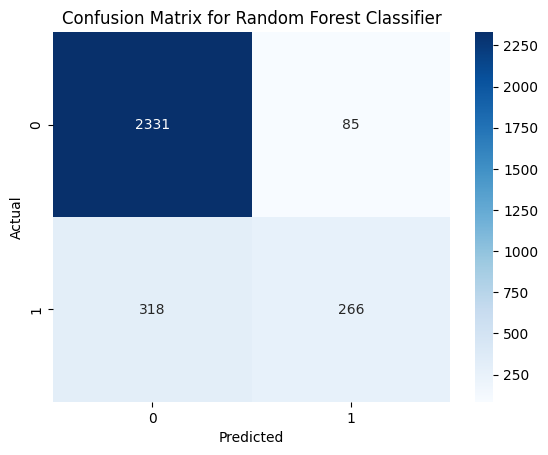

In [35]:
plt.figsize=(8,6)
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show

- The True Possitive shows the count of correctly classified data point ewhereas the Flase Positive elements are those that are misclassified by the model. The higher the true Positive value of the confusion matrix the better, indicating many correct predictions

<ipython-input-36-5cd93635b6d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-36-5cd93635b6d4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfc_pred, hist=False, color="b", label = "Fitted Values", 

<Axes: xlabel='Churn', ylabel='Density'>

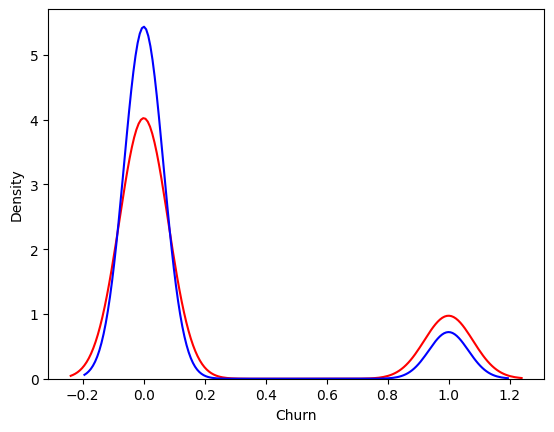

In [36]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label = "Fitted Values", ax=ax )

### Classification Report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.76      0.46      0.57       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.86      0.87      0.85      3000



In [38]:

print("Accuracy Score: ", accuracy_score(y_test, rfc_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rfc_pred))
print("R2 Score: ", r2_score(y_test, rfc_pred))

Accuracy Score:  0.8656666666666667
Mean Absolute Error:  0.13433333333333333
R2 Score:  0.14312687108772582


## Conclusion

### Exploratory Data Analysis Conclusion

From the exploratory data analysis, I have concluded that the churn count of the customers depends on the following factors:

- **Age**
- **Geography**
- **Tenure**
- **Balance**
- **Number of Products**
- **Has Credit Card**
- **Is Active Member**

### Classification Models

I have used the following models for classification:

- **Decision Tree Classifier**
- **Random Forest Classifier**

Both models were hyperparameter tuned using `GridSearchCV`. While both models have nearly equal accuracy scores, the **Random Forest Classifier** outperforms the **Decision Tree Classifier** in terms of accuracy and precision.
|
